In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
# colab 에서도 아래 설치 문구의 주석을 제거하고 설치하고 import 해주기만 하면 한글폰트가 잘 나옵니다.
# !pip install koreanize-matplotlib

import koreanize_matplotlib

# df = pd.read_csv("boostcourse-ds-510/data/NHIS_OPEN_GJ_2017.CSV.zip", encoding="cp949")
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/NHIS_OPEN_GJ_2017.CSV.zip",
                 encoding="cp949")

# Q1

In [4]:
# 일단 제공되는 딕셔너리 실행
age_code = {1: '0~4세',
 2: '5~9세',
 3: '10~14세',
 4: '15~19세',
 5: '20~24세',
 6: '25~29세',
 7: '30~34세',
 8: '35~39세',
 9: '40~44세',
 10: '45~49세',
 11: '50~54세',
 12: '55~59세',
 13: '60~64세',
 14: '65~69세',
 15: '70~74세',
 16: '75~79세',
 17: '80~84세',
 18: '85세+'}

In [6]:
df.describe()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
count,1000000.0,1000000.000000,1000000.000000,1000000.000000,1000000.000000,999738.000000,999732.000000,999560.000000,999712.000000,999721.000000,...,999955.000000,999840.000000,999475.000000,1000000.000000,0.0,0.0,0.0,0.0,398748.000000,1000000.0
mean,2017.0,500000.500000,1.468828,10.539593,33.733031,162.217421,63.409614,81.370788,0.978897,0.976267,...,37.233369,1.606411,0.497007,0.398748,NaN,NaN,NaN,NaN,0.602157,20181126.0
std,0.0,288675.278933,0.499028,2.860117,12.654664,9.399948,12.879205,12.205698,0.610948,0.605323,...,50.605298,0.817844,0.499991,0.489641,NaN,NaN,NaN,NaN,0.590314,0.0
min,2017.0,1.000000,1.000000,5.000000,11.000000,85.000000,20.000000,0.000000,0.100000,0.100000,...,1.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,20181126.0
25%,2017.0,250000.750000,1.000000,8.000000,27.000000,155.000000,55.000000,74.200000,0.700000,0.700000,...,16.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,20181126.0
50%,2017.0,500000.500000,1.000000,11.000000,41.000000,160.000000,60.000000,81.000000,1.000000,1.000000,...,23.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,1.000000,20181126.0
75%,2017.0,750000.250000,2.000000,13.000000,44.000000,170.000000,70.000000,88.000000,1.200000,1.200000,...,40.000000,2.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,1.000000,20181126.0
max,2017.0,1000000.000000,2.000000,18.000000,50.000000,200.000000,180.000000,999.000000,9.900000,9.900000,...,999.000000,3.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,2.000000,20181126.0


In [8]:
# 일단 age_code 없이 비슷한 형태를 만들어보기로 결정
df.groupby(["연령대코드(5세단위)"])["허리둘레"].describe()

,count,mean,std,min,25%,50%,75%,max
연령대코드(5세단위),,,,,,,,
5,23244.0,75.152220,12.251781,47.5,67.5,73.4,81.0,999.0
6,64898.0,77.704783,16.735734,48.0,69.0,76.5,84.2,999.0
7,77517.0,81.089268,22.988111,49.0,72.0,80.1,88.0,999.0
8,84621.0,82.094012,14.522095,9.2,75.0,82.0,89.0,999.0
9,130912.0,80.488308,10.803098,42.1,73.0,80.0,87.0,999.0
10,118357.0,80.822449,9.521622,40.0,74.0,81.0,87.0,137.0
11,129833.0,81.062754,9.095438,6.5,75.0,81.0,87.0,142.0
12,112175.0,81.799905,8.730398,32.0,76.0,82.0,87.5,139.0
13,106491.0,82.722769,8.596176,0.0,77.0,83.0,88.0,137.0


In [69]:
# 비슷한 형태가 된 것을 수정할려고 df_1로 선언하고, 혹시 모르니 copy도 붙였다.
df_1 = df.groupby(["연령대코드(5세단위)"])["허리둘레"].describe().copy()
df_1

,count,mean,std,min,25%,50%,75%,max
연령대코드(5세단위),,,,,,,,
5,23244.0,75.152220,12.251781,47.5,67.5,73.4,81.0,999.0
6,64898.0,77.704783,16.735734,48.0,69.0,76.5,84.2,999.0
7,77517.0,81.089268,22.988111,49.0,72.0,80.1,88.0,999.0
8,84621.0,82.094012,14.522095,9.2,75.0,82.0,89.0,999.0
9,130912.0,80.488308,10.803098,42.1,73.0,80.0,87.0,999.0
10,118357.0,80.822449,9.521622,40.0,74.0,81.0,87.0,137.0
11,129833.0,81.062754,9.095438,6.5,75.0,81.0,87.0,142.0
12,112175.0,81.799905,8.730398,32.0,76.0,82.0,87.5,139.0
13,106491.0,82.722769,8.596176,0.0,77.0,83.0,88.0,137.0


In [151]:
# 진짜 고민을 해도 해도 모르겠던 찰라!
# rename 방식과 dictionary 형태가 유사한 것을 보고 그냥 이렇게 했다...ㅎ;;
df_2 = df_1.rename(columns = {'연령대코드(5세단위)': '연령대'},
                  index = {1: '0~4세',
 2: '5~9세',
 3: '10~14세',
 4: '15~19세',
 5: '20~24세',
 6: '25~29세',
 7: '30~34세',
 8: '35~39세',
 9: '40~44세',
 10: '45~49세',
 11: '50~54세',
 12: '55~59세',
 13: '60~64세',
 14: '65~69세',
 15: '70~74세',
 16: '75~79세',
 17: '80~84세',
 18: '85세+'})
df_2

,count,mean,std,min,25%,50%,75%,max
연령대코드(5세단위),,,,,,,,
20~24세,23244.0,75.152220,12.251781,47.5,67.5,73.4,81.0,999.0
25~29세,64898.0,77.704783,16.735734,48.0,69.0,76.5,84.2,999.0
30~34세,77517.0,81.089268,22.988111,49.0,72.0,80.1,88.0,999.0
35~39세,84621.0,82.094012,14.522095,9.2,75.0,82.0,89.0,999.0
40~44세,130912.0,80.488308,10.803098,42.1,73.0,80.0,87.0,999.0
45~49세,118357.0,80.822449,9.521622,40.0,74.0,81.0,87.0,137.0
50~54세,129833.0,81.062754,9.095438,6.5,75.0,81.0,87.0,142.0
55~59세,112175.0,81.799905,8.730398,32.0,76.0,82.0,87.5,139.0
60~64세,106491.0,82.722769,8.596176,0.0,77.0,83.0,88.0,137.0


# Q2

In [75]:
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상',
       '치석', '데이터공개일자'],
      dtype='object')

In [90]:
# 비교할 columns을 변수에 담는다.
columns = ["음주여부", "흡연상태", "연령대코드(5세단위)", "성별코드"]
columns

['음주여부', '흡연상태', '연령대코드(5세단위)', '성별코드']

In [95]:
# column간의 상관계수를 먼저 구한다.
df_small = df[columns]
df_corr = df_small.corr()
df_corr

,음주여부,흡연상태,연령대코드(5세단위),성별코드
음주여부,1.000000,0.352014,-0.283296,-0.368630
흡연상태,0.352014,1.000000,-0.125714,-0.588491
연령대코드(5세단위),-0.283296,-0.125714,1.000000,0.080093
성별코드,-0.368630,-0.588491,0.080093,1.000000


<AxesSubplot:>

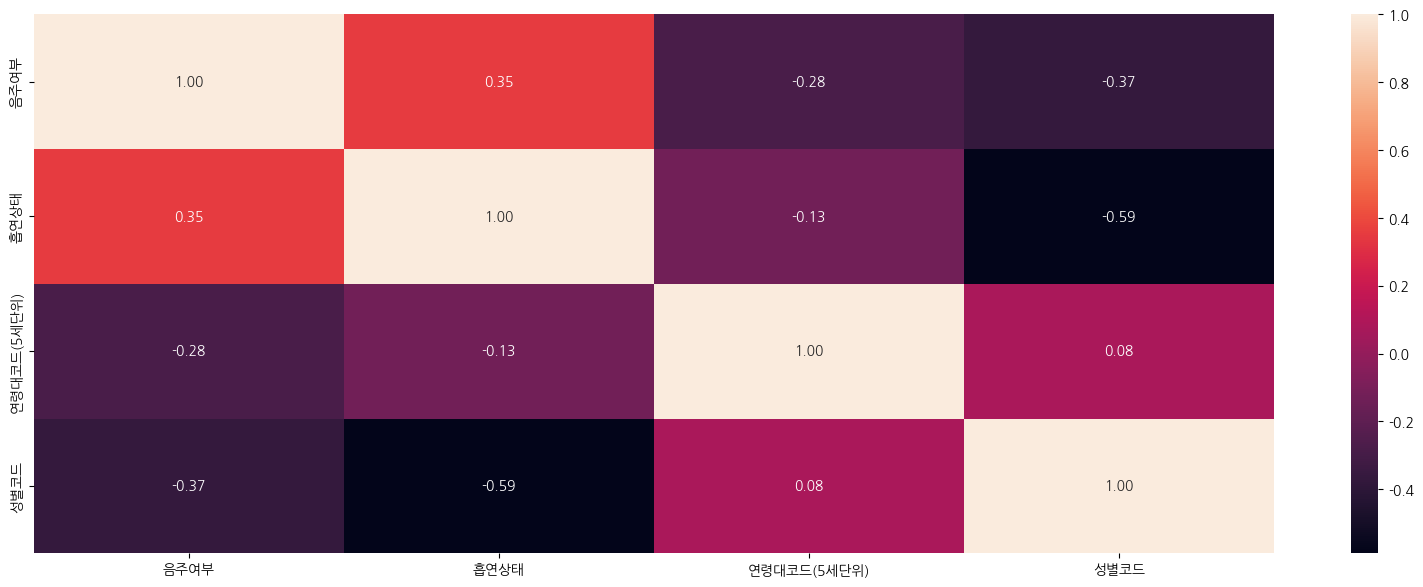

In [96]:
# 구한 상관계수를 heatmap으로 나타냈다. 소수점 2째자리까지
plt.figure(figsize=(20,7))
sns.heatmap(df_corr, annot=True, fmt=".2f")

C:\Users\82107\AppData\Local\Temp\ipykernel_12008\3878863236.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df_corr, dtype=np.bool))


<AxesSubplot:>

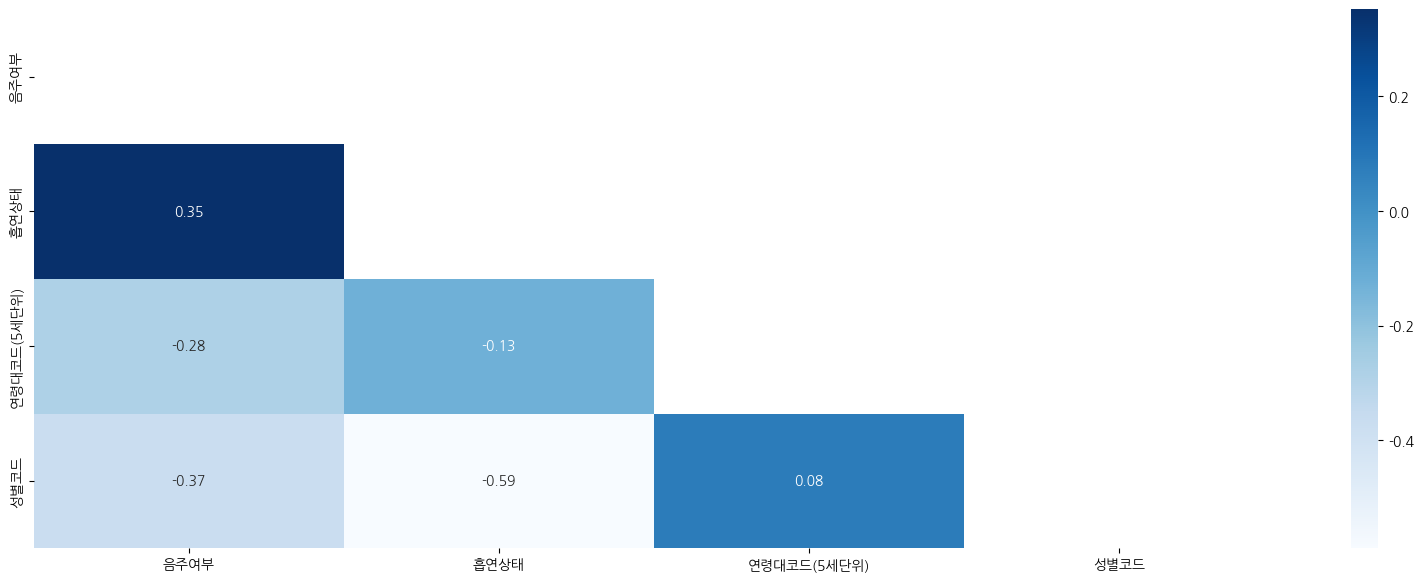

In [98]:
# mask를 이용해서 대각선의 아래부분만 남기었다.
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))

plt.figure(figsize=(20, 7))
sns.heatmap(df_corr, annot=True, fmt=".2f", cmap="Blues", mask=mask )

C:\Users\82107\AppData\Local\Temp\ipykernel_12008\579209833.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df_corr, dtype=np.bool))


<AxesSubplot:>

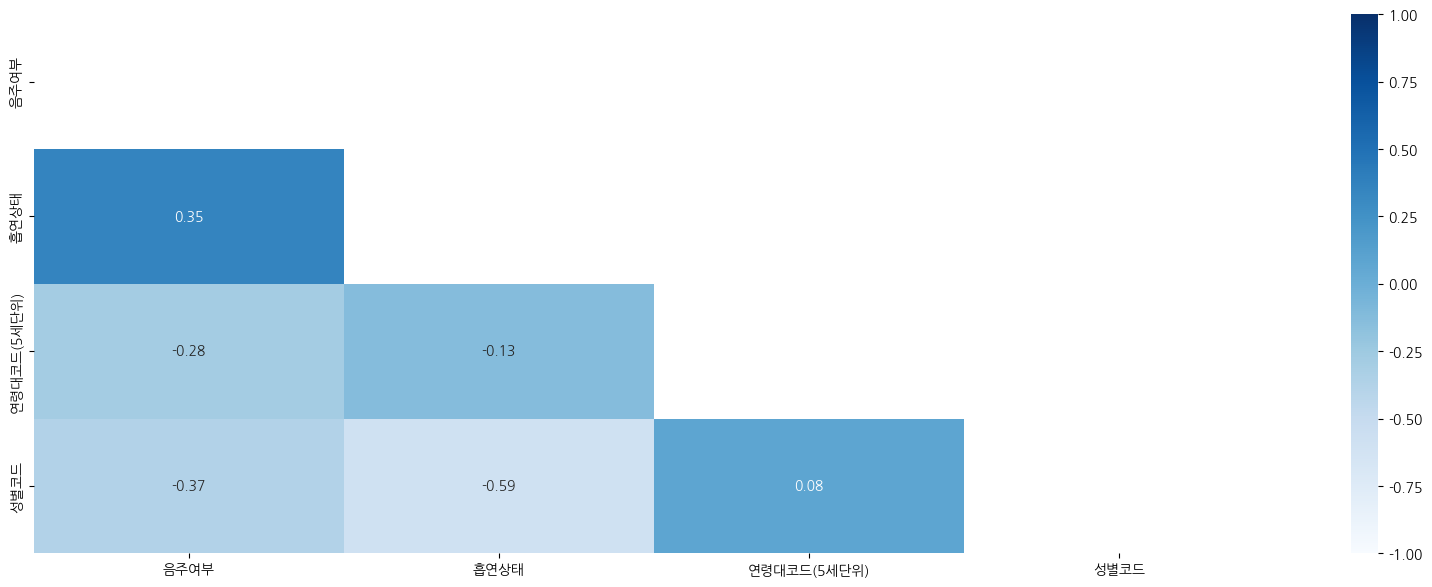

In [99]:
# mask를 사용하고 보니, 우측의 vmax와 vmin값이 출력예시와 달라서 추가했다.
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))

plt.figure(figsize=(20, 7))
sns.heatmap(df_corr, annot=True, fmt=".2f", cmap="Blues", mask=mask, vmax = 1 , vmin = -1 )

# Q3

In [122]:
# 시리즈로 따로 빼보았다.
음주 = df["음주여부"]
음주

0         0.0
1         0.0
2         0.0
3         1.0
4         0.0
         ... 
999995    1.0
999996    0.0
999997    0.0
999998    1.0
999999    0.0
Name: 음주여부, Length: 1000000, dtype: float64

In [123]:
# 흡연도 따로 뺐다.
흡연 = df["흡연상태"]
흡연

0         3.0
1         1.0
2         1.0
3         1.0
4         3.0
         ... 
999995    1.0
999996    1.0
999997    1.0
999998    2.0
999999    1.0
Name: 흡연상태, Length: 1000000, dtype: float64

In [131]:
# crosstab을 읽어보니 간단해보여서 했다.
# 모양이 조금 달라서 이런 저런 고민을 했지만, 그냥 이대로 하기로 결정했다.
pd.crosstab([음주], [흡연])

흡연상태,1.0,2.0,3.0
음주여부,,,
0.0,394503,55334,52845
1.0,213743,120779,162166


In [134]:
df_q4 = pd.crosstab([음주], [흡연])
df_q4

흡연상태,1.0,2.0,3.0
음주여부,,,
0.0,394503,55334,52845
1.0,213743,120779,162166


In [136]:
# 출력 예시처럼 음주여부 순서를 바꾸었다.
df_sort = df_q4.sort_values(by = ["음주여부"],ascending=False)
df_sort

흡연상태,1.0,2.0,3.0
음주여부,,,
1.0,213743,120779,162166
0.0,394503,55334,52845


In [144]:
# 출력예시처럼 이름을 바꾸어준다.
df_rename = df_sort.rename(columns = {1.0: '흡연안함', 2.0: "끊음", 3: "흡연중"},
                  index = {1.0: '마심', 0.0:'안마심'})

df_rename

흡연상태,흡연안함,끊음,흡연중
음주여부,,,
마심,213743,120779,162166
안마심,394503,55334,52845


In [154]:
# 컬럼 순서도 출력예시처럼 바꾸어주었다.
df_rename2 = df_rename[["끊음", "흡연안함", "흡연중"]]
df_rename2

흡연상태,끊음,흡연안함,흡연중
음주여부,,,
마심,120779,213743,162166
안마심,55334,394503,52845


In [ ]:
# ㅜㅜ...왜 안될까..

In [162]:
sns.set(font_scale=1, font="Malgun Gothic")
sns.countplot(data=df_rename2, x= "흡연상태", hue = "음주여부")

ValueError: Could not interpret input '흡연상태'